In [1]:
import pandas as pd
from astropy import units as u

fname = '/Users/ytcheng/sim_cii/data_catalog/SIDES_with_lines_CO_CII.csv'
df_all = pd.read_csv(fname)


In [2]:
print(list(df_all))

['Unnamed: 0', 'redshift', 'ra', 'dec', 'Mhalo', 'Mstar', 'qflag', 'SFR', 'mu', 'issb', 'Umean', 'SMIPS24', 'SPACS70', 'SPACS100', 'SPACS160', 'SSPIRE250', 'SSPIRE350', 'SSPIRE500', 'SNIKA1200', 'SNIKA2000', 'SCCAT200', 'SCCAT350', 'SCCAT450', 'SCCAT750', 'SCCAT850', 'SCCAT1100', 'SCCAT1300', 'SCCAT2000', 'SCCAT3300', 'SSPIRE250ext', 'SSPIRE350ext', 'SSPIRE500ext', 'DL', 'ICO10', 'ICO21', 'ICO32', 'ICO43', 'ICO54', 'ICO65', 'ICO76', 'ICO87', 'ICII', 'LCII']


In [3]:
df_all[['redshift', 'ra', 'dec', 'Mhalo', 'Mstar', 'qflag', 'SFR', 'mu', 'issb', 'Umean', 'SMIPS24']].describe()

,redshift,ra,dec,Mhalo,Mstar,qflag,SFR,mu,issb,Umean,SMIPS24
count,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06,5.584998e+06
mean,2.734982e+00,7.039533e-01,6.972193e-01,1.064088e+11,9.092136e+08,3.480556e-02,1.375755e+00,9.538549e-01,2.837315e-02,2.974601e+01,2.560716e-06
std,1.484305e+00,4.041831e-01,4.038262e-01,7.740619e+11,7.074330e+09,1.832870e-01,1.244725e+01,2.439509e-01,1.660365e-01,2.380557e+01,5.272227e-05
min,2.546800e-02,0.000000e+00,0.000000e+00,7.618732e+07,1.000001e+07,0.000000e+00,0.000000e+00,8.050000e-02,0.000000e+00,1.313068e+00,0.000000e+00
25%,1.510976e+00,3.536190e-01,3.476190e-01,2.057080e+10,1.645674e+07,0.000000e+00,2.568325e-02,8.843665e-01,0.000000e+00,1.214016e+01,3.633713e-09
50%,2.750341e+00,7.054865e-01,6.967940e-01,3.748378e+10,3.332762e+07,0.000000e+00,7.085209e-02,9.621806e-01,0.000000e+00,2.328049e+01,2.681513e-08
75%,3.610307e+00,1.054712e+00,1.044422e+00,7.359735e+10,1.119962e+08,0.000000e+00,2.495195e-01,1.009257e+00,0.000000e+00,3.971642e+01,1.738318e-07
max,9.993294e+00,1.400000e+00,1.400000e+00,4.190855e+14,3.997949e+11,1.000000e+00,9.974565e+02,4.821933e+01,1.000000e+00,1.990536e+02,3.713385e-02


In [4]:
df_all = df_all[['ra','dec','redshift','SMIPS24']].copy()

In [5]:
ra_arr = df_all['ra'].values * u.deg
dec_arr = df_all['dec'].values * u.deg
z_arr = df_all['redshift'].values
Fnu_arr = df_all['SMIPS24'].values

ra_arr = ra_arr[Fnu_arr!=0]
dec_arr = dec_arr[Fnu_arr!=0]
z_arr = z_arr[Fnu_arr!=0]
Fnu_arr = Fnu_arr[Fnu_arr!=0]

m_arr = -2.5 * np.log10(Fnu_arr) + 8.9
x_arr = (ra_arr / (7 * u.arcsec)).decompose().value - 0.5
y_arr = (dec_arr / (7 * u.arcsec)).decompose().value - 0.5

In [7]:
dm = 0.5
msim_arr = np.arange(13,38,dm)
Nsim_arr = np.asarray([len(m_arr[m_arr < m]) for m in msim_arr]) / 1.4**2

In [8]:
helgdir = '/Users/ytcheng/ciber/doc/20170904_External/helgason/'
helgdat = np.loadtxt(helgdir + 'Helgason125.txt', skiprows=1, delimiter=',')
helg_m_dat = helgdat[:,0]
helg_N_dat = helgdat[:,1]
mhelg_arr = np.arange(13,33,0.1)
nhelg_arr = np.exp(np.interp(np.arange(13,33,0.1), helg_m_dat, np.log(helg_N_dat)))
Nhelg_arr = np.asarray([sum(nhelg_arr[mhelg_arr<=m]) for m in msim_arr]) * 0.1
mhelg_arr = msim_arr

mhelg_bins = np.asarray([16,17,18,19,20])
counts_bins = np.exp(np.interp(mhelg_bins, mhelg_arr, np.log(Nhelg_arr)))
msim_bins = np.interp(np.log(counts_bins), np.log(Nsim_arr), msim_arr)

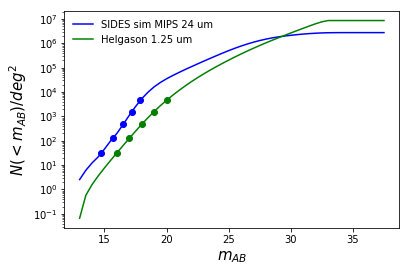

In [9]:
#plt.figure(dpi = 200)
plt.plot(msim_arr, Nsim_arr, 'b', label = 'SIDES sim MIPS 24 um')
plt.plot(mhelg_arr, Nhelg_arr, 'g', label = 'Helgason 1.25 um')
plt.plot(mhelg_bins, counts_bins,'go')
plt.plot(msim_bins, counts_bins,'bo')
plt.legend(loc=0, frameon = False)
plt.xlabel('$m_{AB}$', fontsize = 15)
plt.ylabel('$N(< m_{AB})/deg^2$',fontsize = 15)
plt.yscale('log')

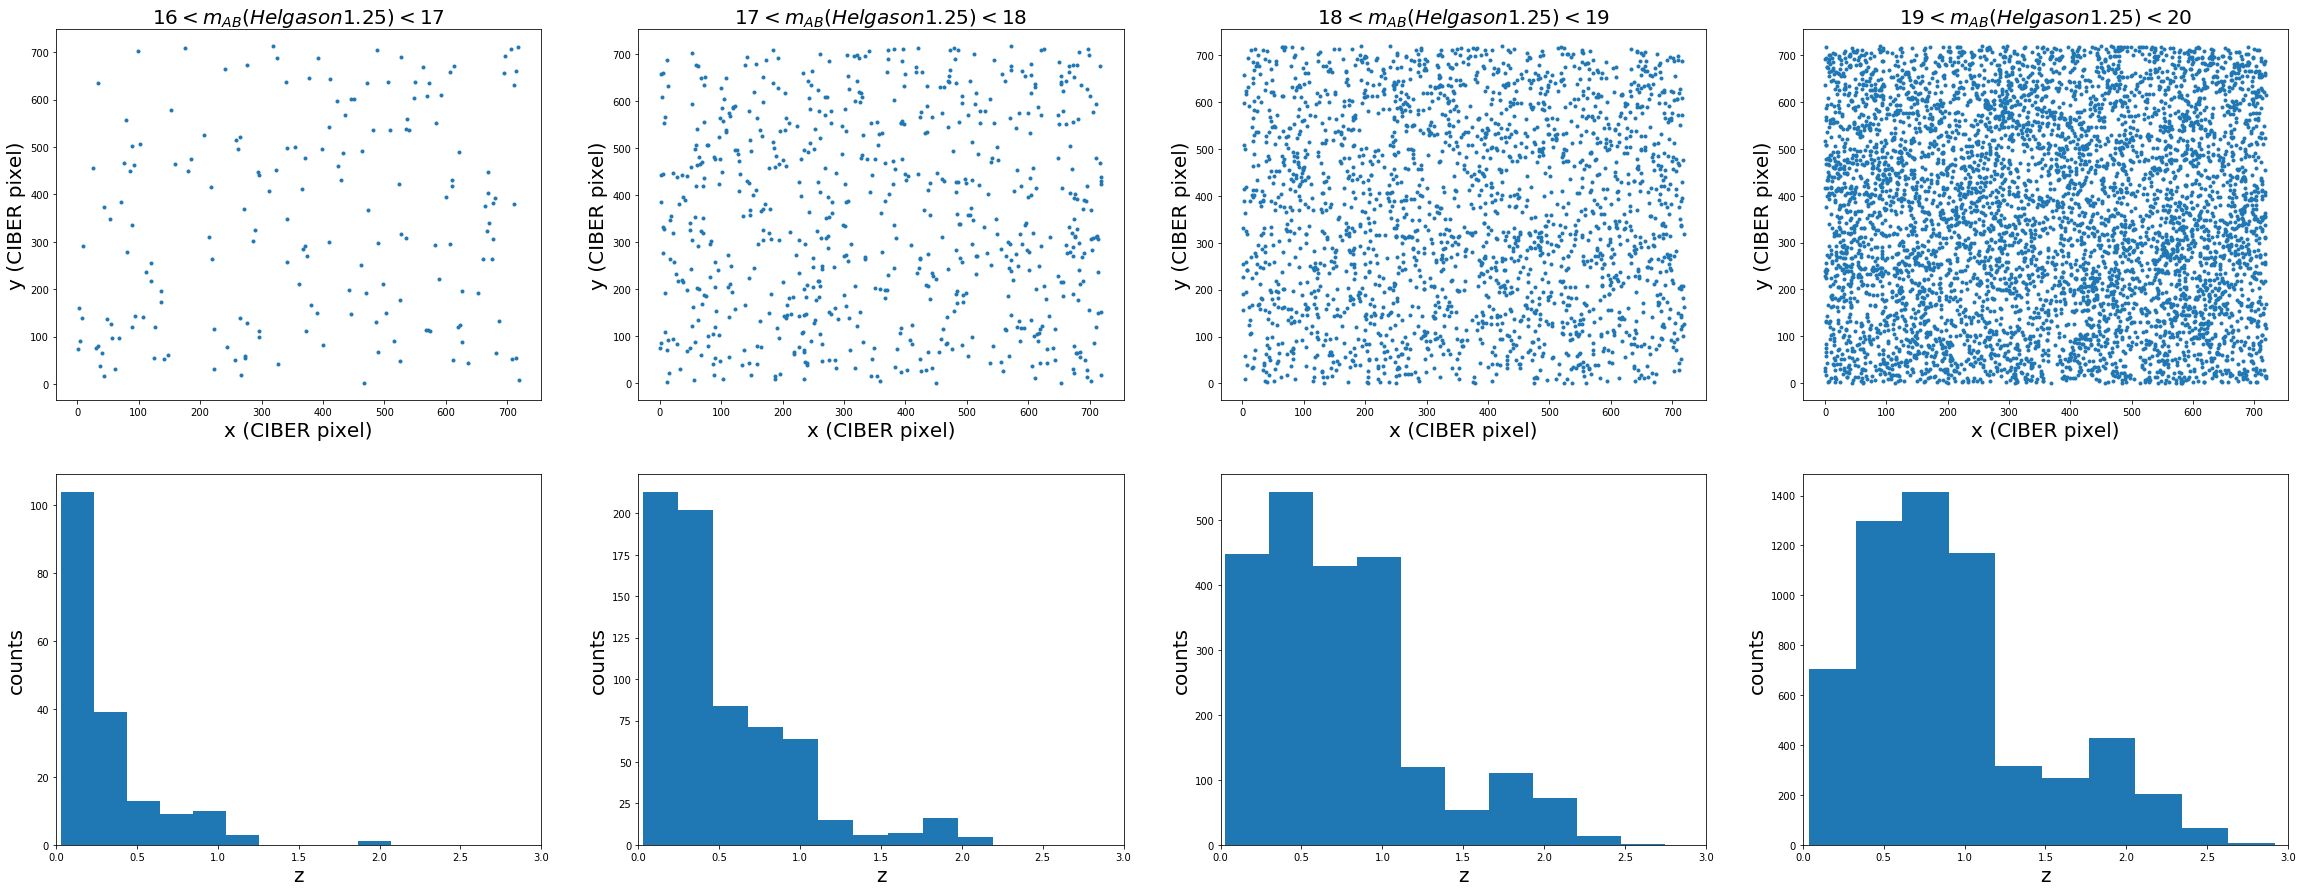

In [10]:
fig, ax = plt.subplots(2,4,figsize=(40,15))

for i in range(len(mhelg_bins)-1):
    m_min_helg = mhelg_bins[i]
    m_max_helg = mhelg_bins[i+1]
    m_min = msim_bins[i]
    m_max = msim_bins[i+1]
    sp = (m_arr>m_min) & (m_arr<m_max)
    ax[0][i].plot(x_arr[sp],y_arr[sp], '.')
    ax[0][i].set_title(r'%d$ < m_{AB}(Helgason 1.25) < $%d'%(m_min_helg, m_max_helg), fontsize = 20)
    ax[0][i].set_xlabel('x (CIBER pixel)', fontsize = 20)
    ax[0][i].set_ylabel('y (CIBER pixel)', fontsize = 20)
    z = z_arr[sp]
    ax[1][i].hist(z)
    ax[1][i].set_xlabel('z', fontsize = 20)
    ax[1][i].set_ylabel('counts', fontsize = 20)
    ax[1][i].set_xlim([0,3])